Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
(150, 5)
accuracy score:  0.8666666666666667


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


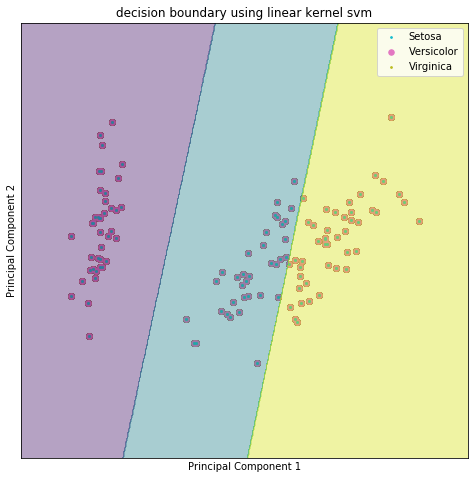

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.decomposition import PCA


# reading the dataset:
iris= pd.read_csv(r'C:\Users\Admin\.jupyter\iris dataset.csv',header=0)
print(iris.columns)
print(iris.shape) 
x= iris.drop('variety',axis=1) 
iris['variety']=iris['variety'].astype('category')  # to categorize setosa=0, versicolor=1, virginica=2
y= iris['variety'].cat.codes
   
h = .02  # step size in the mesh
#splitting test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.head()

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

# we create an instance of SVM and fit out data using different kernels
svc = svm.SVC(kernel='linear', C=0.1).fit(pca_2d, y_train)      # linear kernel
rbf = svm.SVC(kernel='rbf', gamma=0.7, C=0.1).fit(pca_2d, y_train)  #rbf kernel
poly = svm.SVC(kernel='poly', degree=3, C=0.1).fit(pca_2d, y_train)  # polynomial kernel
lin = svm.LinearSVC(C=0.1).fit(pca_2d, y_train)  # linear svm

# create a mesh to plot in
x_min, x_max = pca_2d[:, 0].min() - 1, pca_2d[:, 0].max() + 1   # choosing points for making mesh 
y_min, y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

y_pred=lin.predict(pca_2d)# predicting y values for calculating score

#d) calculating the accuracy score
print("accuracy score: ",accuracy_score(y_train,y_pred))


a= y_train.tolist()  # converting dataset into list
fig= plt.figure(figsize=[8,8])      
for i in range(0,pca_2d.shape[0]):    # choosing the points for labelling on the scatter plot
        if (a[i]==0):                   # if y=0 then setosa
            c1= plt.scatter(pca_2d[:, 0], pca_2d[:, 1], s=3)
        elif(a[i]==1):                  # if y=1 then versicolor
            c2= plt.scatter(pca_2d[:, 0], pca_2d[:, 1],s=30)
        elif(a[i]==2):                  # if y=2 then virginica
            c3= plt.scatter(pca_2d[:, 0], pca_2d[:, 1], s=3)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])    # predicting values of y for making contour
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,alpha=0.4)      # making contour for defining decision boundary             
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor',   'Virginica'])  # setting the legends value
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks(())
plt.yticks(())
plt.title('decision boundary using linear kernel svm')
plt.show()
    
